In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
from textblob import TextBlob
import nltk
import tslearn
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import preprocessing
import timestring
import datetime

In [114]:
StockMarket = pd.read_csv("StockData.csv", sep = ",")
NewsData = pd.read_csv("NewsData.csv", sep=",")

NewsData.head()



StockDate CompanyName  \
0  April 30, 2019 17:00 pm +08      HLBANK   
1  April 30, 2019 09:10 am +08      HLBANK   
2  April 26, 2019 10:18 am +08      HLBANK   
3  April 18, 2019 13:10 pm +08      HLBANK   
4  April 18, 2019 10:21 am +08      HLBANK   

                                          NewsHeader  \
0  Are banks worth a second look as half of them ...   
1  KLCI drifts lower in line with region, key Chi...   
2  KLCI retreats in line with subdued regional ma...   
3       KLCI falls 0.59% as Public Bank, Maxis weigh   
4  KLCI stays in negative zone on worries of pote...   

                                            NewsInfo  \
0  HALF of the banks listed on Bursa Malaysia hav...   
1  KUALA LUMPUR (April 30): The FBM KLCI drifted ...   
2  KUALA LUMPUR (April 26): The FBM KLCI retreate...   
3  KUALA LUMPUR (April 18): The FBM KLCI fell 0.5...   
4  KUALA LUMPUR (April 18): The FBM KLCI remained...   

                                            NewsLink  
0  https://www.theedgemarkets.com/article/are-ban...  
1  https://www.theedgemarkets.com/article/klci-dr...  
2  https://www.theedgemarkets.com/article/klci-re...  
3  https://www.theedgemarkets.com/article/klci-fa...  
4  https://www.theedgemarkets.com/article/klci-st...

In [115]:
NewsData["StockDate"]= NewsData["StockDate"].apply(lambda x:timestring.Date(x).date)
NewsData.head()

StockDate CompanyName  \
0 2019-04-30 17:00:00      HLBANK   
1 2019-04-30 09:10:00      HLBANK   
2 2019-04-26 10:18:00      HLBANK   
3 2019-04-18 13:10:00      HLBANK   
4 2019-04-18 10:21:00      HLBANK   

                                          NewsHeader  \
0  Are banks worth a second look as half of them ...   
1  KLCI drifts lower in line with region, key Chi...   
2  KLCI retreats in line with subdued regional ma...   
3       KLCI falls 0.59% as Public Bank, Maxis weigh   
4  KLCI stays in negative zone on worries of pote...   

                                            NewsInfo  \
0  HALF of the banks listed on Bursa Malaysia hav...   
1  KUALA LUMPUR (April 30): The FBM KLCI drifted ...   
2  KUALA LUMPUR (April 26): The FBM KLCI retreate...   
3  KUALA LUMPUR (April 18): The FBM KLCI fell 0.5...   
4  KUALA LUMPUR (April 18): The FBM KLCI remained...   

                                            NewsLink  
0  https://www.theedgemarkets.com/article/are-ban...  
1  https://www.theedgemarkets.com/article/klci-dr...  
2  https://www.theedgemarkets.com/article/klci-re...  
3  https://www.theedgemarkets.com/article/klci-fa...  
4  https://www.theedgemarkets.com/article/klci-st...

In [116]:
NewsData["StockDate"] = NewsData["StockDate"].apply(lambda x:pd.datetime.date(pd.to_datetime(x)))
NewsData.head()

StockDate CompanyName                                         NewsHeader  \
0  2019-04-30      HLBANK  Are banks worth a second look as half of them ...   
1  2019-04-30      HLBANK  KLCI drifts lower in line with region, key Chi...   
2  2019-04-26      HLBANK  KLCI retreats in line with subdued regional ma...   
3  2019-04-18      HLBANK       KLCI falls 0.59% as Public Bank, Maxis weigh   
4  2019-04-18      HLBANK  KLCI stays in negative zone on worries of pote...   

                                            NewsInfo  \
0  HALF of the banks listed on Bursa Malaysia hav...   
1  KUALA LUMPUR (April 30): The FBM KLCI drifted ...   
2  KUALA LUMPUR (April 26): The FBM KLCI retreate...   
3  KUALA LUMPUR (April 18): The FBM KLCI fell 0.5...   
4  KUALA LUMPUR (April 18): The FBM KLCI remained...   

                                            NewsLink  
0  https://www.theedgemarkets.com/article/are-ban...  
1  https://www.theedgemarkets.com/article/klci-dr...  
2  https://www.theedgemarkets.com/article/klci-re...  
3  https://www.theedgemarkets.com/article/klci-fa...  
4  https://www.theedgemarkets.com/article/klci-st...

In [117]:
NewsData["headerpolarity"] = [TextBlob(NewsData["NewsHeader"].iloc[i]).polarity for i in range(0,NewsData.shape[0])]


In [118]:
NewsData["newsinfopolarity"] = [TextBlob(NewsData["NewsInfo"].iloc[i]).polarity for i in range(0,NewsData.shape[0])]
NewsData.head()

StockDate CompanyName                                         NewsHeader  \
0  2019-04-30      HLBANK  Are banks worth a second look as half of them ...   
1  2019-04-30      HLBANK  KLCI drifts lower in line with region, key Chi...   
2  2019-04-26      HLBANK  KLCI retreats in line with subdued regional ma...   
3  2019-04-18      HLBANK       KLCI falls 0.59% as Public Bank, Maxis weigh   
4  2019-04-18      HLBANK  KLCI stays in negative zone on worries of pote...   

                                            NewsInfo  \
0  HALF of the banks listed on Bursa Malaysia hav...   
1  KUALA LUMPUR (April 30): The FBM KLCI drifted ...   
2  KUALA LUMPUR (April 26): The FBM KLCI retreate...   
3  KUALA LUMPUR (April 18): The FBM KLCI fell 0.5...   
4  KUALA LUMPUR (April 18): The FBM KLCI remained...   

                                            NewsLink  headerpolarity  \
0  https://www.theedgemarkets.com/article/are-ban...        0.044444   
1  https://www.theedgemarkets.com/article/klci-dr...        0.000000   
2  https://www.theedgemarkets.com/article/klci-re...        0.000000   
3  https://www.theedgemarkets.com/article/klci-fa...        0.000000   
4  https://www.theedgemarkets.com/article/klci-st...       -0.150000   

   newsinfopolarity  
0          0.101884  
1          0.093237  
2          0.023519  
3         -0.050418  
4         -0.040598

In [119]:
NewsData['polarity'] = NewsData[['headerpolarity','newsinfopolarity']].sum(axis=1)
NewsData.head()

StockDate CompanyName                                         NewsHeader  \
0  2019-04-30      HLBANK  Are banks worth a second look as half of them ...   
1  2019-04-30      HLBANK  KLCI drifts lower in line with region, key Chi...   
2  2019-04-26      HLBANK  KLCI retreats in line with subdued regional ma...   
3  2019-04-18      HLBANK       KLCI falls 0.59% as Public Bank, Maxis weigh   
4  2019-04-18      HLBANK  KLCI stays in negative zone on worries of pote...   

                                            NewsInfo  \
0  HALF of the banks listed on Bursa Malaysia hav...   
1  KUALA LUMPUR (April 30): The FBM KLCI drifted ...   
2  KUALA LUMPUR (April 26): The FBM KLCI retreate...   
3  KUALA LUMPUR (April 18): The FBM KLCI fell 0.5...   
4  KUALA LUMPUR (April 18): The FBM KLCI remained...   

                                            NewsLink  headerpolarity  \
0  https://www.theedgemarkets.com/article/are-ban...        0.044444   
1  https://www.theedgemarkets.com/article/klci-dr...        0.000000   
2  https://www.theedgemarkets.com/article/klci-re...        0.000000   
3  https://www.theedgemarkets.com/article/klci-fa...        0.000000   
4  https://www.theedgemarkets.com/article/klci-st...       -0.150000   

   newsinfopolarity  polarity  
0          0.101884  0.146329  
1          0.093237  0.093237  
2          0.023519  0.023519  
3         -0.050418 -0.050418  
4         -0.040598 -0.190598

In [120]:
HLBANK_NewsData = NewsData



In [121]:
HLBANK_NewsData = HLBANK_NewsData.iloc[np.where(NewsData["CompanyName"]=="HLBANK")]
HLBANK_NewsData

StockDate CompanyName                                         NewsHeader  \
0   2019-04-30      HLBANK  Are banks worth a second look as half of them ...   
1   2019-04-30      HLBANK  KLCI drifts lower in line with region, key Chi...   
2   2019-04-26      HLBANK  KLCI retreats in line with subdued regional ma...   
3   2019-04-18      HLBANK       KLCI falls 0.59% as Public Bank, Maxis weigh   
4   2019-04-18      HLBANK  KLCI stays in negative zone on worries of pote...   
5   2019-04-15      HLBANK  KLCI rises 0.38% on revived ECRL news, firmer ...   
6   2019-04-15      HLBANK   KLCI rises 0.37% as Petronas-linked stocks lift    
7   2019-04-09      HLBANK  BNM’s proposed capital requirement increase fo...   
8   2019-04-09      HLBANK                  KLCI down 0.16% as IHH, MAHB drag   
9   2019-04-08      HLBANK  BNM’s proposed capital requirement increase fo...   
10  2019-04-08      HLBANK  KLCI stays in positive zone in line with regio...   
11  2019-04-08      HLBANK            SMEs should look beyond financing — HLB   
12  2019-04-04      HLBANK                   KLCI pares loss as Tenaga climbs   
13  2019-04-04      HLBANK   KLCI stays in red as Genting-linked stocks weigh   
14  2019-04-03      HLBANK       KLCI up 0.37% as Public Bank, Top Glove lift   
15  2019-04-03      HLBANK      KLCI edges up 0.28% as select blue chips lift   
16  2019-04-02      HLBANK  KLCI pares gains, up 0.34% in line with region...   
17  2019-04-02      HLBANK    KLCI rises 0.51% as Petronas-linked stocks lift   
18  2019-04-02      HLBANK         KLCI rebounds 0.46% as banking stocks lift   
19  2019-04-01      HLBANK  FBM KLCI falls 0.91%, dragged mainly by bankin...   
20  2019-04-01      HLBANK  KLCI dips 0.47% as Malaysia manufacturing data...   
21  2019-04-01      HLBANK  AllianceDBS Research advises investors to be m...   
22  2019-04-01      HLBANK  KLCI reverses gains as Malaysia PMI falls to 3...   
23  2019-03-29      HLBANK           KLCI pares gains, down 44 points in 1Q19   
24  2019-03-27      HLBANK    KLCI opens lower in line with regional decline    
25  2019-03-26      HLBANK       Hong Leong launches Asia Pacific equity fund   
26  2019-03-25      HLBANK       KLCI falls 0.95% as regional markets stumble   
27  2019-03-22      HLBANK              KLCI bucks regional trend, dips 0.16%   
28  2019-03-22      HLBANK  KLCI rises 0.33% in line with region as Public...   
29  2019-03-21      HLBANK          KLCI loses 1.05% as banks, Top Glove drag   
30  2019-03-21      HLBANK      KLCI rises 0.24% in line with regional gains    
31  2019-03-20      HLBANK  KLCI dips 0.29% as momentum indicators remain ...   
32  2019-03-19      HLBANK             KLCI retreats as sentiment turns tepid   
33  2019-03-19      HLBANK     KLCI edges up, struggles to breach 1,700 level   
34  2019-03-18      HLBANK  KLCI pares gains, up 0.38% as select blue chip...   
35  2019-03-18      HLBANK  KLCI tracks regional markets, up 0.21% as sele...   
36  2019-03-15      HLBANK  Indonesia rises on surprise trade surplus, Phi...   
37  2019-03-15      HLBANK                    Glove makers lead gains in KLCI   
38  2019-03-15      HLBANK  KLCI reverses loss, edges higher in line with ...   

                                             NewsInfo  \
0   HALF of the banks listed on Bursa Malaysia hav...   
1   KUALA LUMPUR (April 30): The FBM KLCI drifted ...   
2   KUALA LUMPUR (April 26): The FBM KLCI retreate...   
3   KUALA LUMPUR (April 18): The FBM KLCI fell 0.5...   
4   KUALA LUMPUR (April 18): The FBM KLCI remained...   
5   KUALA LUMPUR (April 15): The FBM KLCI rose 0.3...   
6   KUALA LUMPUR (April 15): The FBM KLCI rose 0.3...   
7   KUALA LUMPUR: Bank Negara Malaysia’s (BNM) pro...   
8   KUALA LUMPUR (April 9): The FBM KLCI dipped 0....   
9   KUALA LUMPUR (April 8): Bank Negara Malaysia's...   
10  KUALA LUMPUR (April 8): The FBM KLCI remained ...   
11  KUALA LUMPUR: Small and medium enterprises (SM...   
12  KUALA LUMPUR (April

In [122]:
HLBANK_NewsData.index = pd.to_datetime(HLBANK_NewsData["StockDate"])
# Hongleongbank _news.loc[:'2019-03-01']

In [123]:
HLBANK_NewsData1 = HLBANK_NewsData.loc["2019-04-30":"2019-03-01"].resample("B").sum()
HLBANK_NewsData1

headerpolarity  newsinfopolarity  polarity
StockDate                                             
2019-03-15        0.500000          0.180509  0.680509
2019-03-18        0.000000          0.057218  0.057218
2019-03-19        0.000000          0.051420  0.051420
2019-03-20        0.000000          0.045455  0.045455
2019-03-21        0.033333          0.138040  0.171373
2019-03-22        0.000000          0.170526  0.170526
2019-03-25       -0.050000          0.031975 -0.018025
2019-03-26        0.000000          0.084722  0.084722
2019-03-27        0.000000          0.084314  0.084314
2019-03-28        0.000000          0.000000  0.000000
2019-03-29       -0.155556          0.044988 -0.110568
2019-04-01        0.291667          0.182630  0.474297
2019-04-02        0.000000          0.265410  0.265410
2019-04-03        0.250000          0.209324  0.459324
2019-04-04        0.000000          0.055348  0.055348
2019-04-05        0.000000          0.000000  0.000000
2019-04-08        0.454545          0.316672  0.771217
2019-04-09        0.099495          0.073866  0.173361
2019-04-10        0.000000          0.000000  0.000000
2019-04-11        0.000000          0.000000  0.000000
2019-04-12        0.000000          0.000000  0.000000
2019-04-15        0.000000          0.113318  0.113318
2019-04-16        0.000000          0.000000  0.000000
2019-04-17        0.000000          0.000000  0.000000
2019-04-18       -0.150000         -0.091016 -0.241016
2019-04-19        0.000000          0.000000  0.000000
2019-04-22        0.000000          0.000000  0.000000
2019-04-23        0.000000          0.000000  0.000000
2019-04-24        0.000000          0.000000  0.000000
2019-04-25        0.000000          0.000000  0.000000
2019-04-26        0.000000          0.023519  0.023519
2019-04-29        0.000000          0.000000  0.000000
2019-04-30        0.044444          0.195121  0.239565

In [124]:
HLBANK_StockMarket = StockMarket.loc[np.where(StockMarket["companyname"]=="HLBANK")]
HLBANK_StockMarket

Id            stockdate       sector subsector companyname stockcode  \
4857  4858  2019-04-01 16:00:00  main_market   finance      HLBANK      5819   
4858  4859  2019-04-02 16:00:00  main_market   finance      HLBANK      5819   
4859  4860  2019-04-03 16:00:00  main_market   finance      HLBANK      5819   
4860  4861  2019-04-04 16:00:00  main_market   finance      HLBANK      5819   
4861  4862  2019-04-07 16:00:00  main_market   finance      HLBANK      5819   
4862  4863  2019-04-08 16:00:00  main_market   finance      HLBANK      5819   
4863  4864  2019-04-09 16:00:00  main_market   finance      HLBANK      5819   
4864  4865  2019-04-10 16:00:00  main_market   finance      HLBANK      5819   
4865  4866  2019-04-11 16:00:00  main_market   finance      HLBANK      5819   
4866  4867  2019-04-14 16:00:00  main_market   finance      HLBANK      5819   
4867  4868  2019-04-15 16:00:00  main_market   finance      HLBANK      5819   
4868  4869  2019-04-16 16:00:00  main_market   finance      HLBANK      5819   
4869  4870  2019-04-17 16:00:00  main_market   finance      HLBANK      5819   
4870  4871  2019-04-18 16:00:00  main_market   finance      HLBANK      5819   
4871  4872  2019-04-21 16:00:00  main_market   finance      HLBANK      5819   
4872  4873  2019-04-22 16:00:00  main_market   finance      HLBANK      5819   
4873  4874  2019-04-23 16:00:00  main_market   finance      HLBANK      5819   
4874  4875  2019-04-24 16:00:00  main_market   finance      HLBANK      5819   
4875  4876  2019-04-25 16:00:00  main_market   finance      HLBANK      5819   
4876  4877  2019-04-28 16:00:00  main_market   finance      HLBANK      5819   
4877  4878  2019-04-29 16:00:00  main_market   finance      HLBANK      5819   

      openprice  highprice  lowprice  lastprice   volume           created_at  
4857      20.22      20.30     20.00      20.06   190400  2019-04-30 17:28:00  
4858      20.28      20.46     19.92      20.04   238900  2019-04-30 17:28:00  
4859      20.04      20.36     19.94      20.20   747400  2019-04-30 17:28:00  
4860      20.20      20.30     20.18      20.20   542200  2019-04-30 17:28:00  
4861      20.20      20.22     20.02      20.14   766100  2019-04-30 17:28:00  
4862      20.32      20.32     20.04      20.10   321300  2019-04-30 17:28:00  
4863      20.06      20.10     20.04      20.08  1344100  2019-04-30 17:28:00  
4864      20.02      20.08     19.86      20.04   492000  2019-04-30 17:28:00  
4865      20.16      20.16     20.00      20.04   137600  2019-04-30 17:28:00  
4866      20.36      20.36     19.92      20.10   221800  2019-04-30 17:28:00  
4867      20.10      20.10     19.88      20.08   459900  2019-04-30 17:28:00  
4868      19.96      20.00     19.94      20.00   263900  2019-04-30 17:28:00  
4869      20.00      20.00     19.52      19.94  1162600  2019-04-30 17:28:00  
4870      20.00      20.38     19.94      20.08   585100  2019-04-30 17:28:00  
4871      20.10      20.10     19.98      20.04   108300  2019-04-30 17:28:00  
4872      20.00      20.04     19.98      20.02   523400  2019-04-30 17:28:00  
4873      20.04      20.08     19.98      20.02   808200  2019-04-30 17:28:00  
4874      20.02      20.02     19.90      20.00   505300  2019-04-30 17:28:00  
4875      19.94      19.96     19.84      19.96   417400  2019-04-30 17:28:00  
4876      19.96      20.12     19.76      20.08   207800  2019-04-30 17:28:00  
4877      19.84      20.50     19.78      19.98  1009500  2019-04-30 17:28:00

In [125]:
HLBANK_StockMarket["stockdate"] = HLBANK_StockMarket["stockdate"].apply(lambda x:pd.datetime.date(pd.to_datetime(x)))
HLBANK_StockMarket.head()

Id   stockdate       sector subsector companyname stockcode  \
4857  4858  2019-04-01  main_market   finance      HLBANK      5819   
4858  4859  2019-04-02  main_market   finance      HLBANK      5819   
4859  4860  2019-04-03  main_market   finance      HLBANK      5819   
4860  4861  2019-04-04  main_market   finance      HLBANK      5819   
4861  4862  2019-04-07  main_market   finance      HLBANK      5819   

      openprice  highprice  lowprice  lastprice  volume           created_at  
4857      20.22      20.30     20.00      20.06  190400  2019-04-30 17:28:00  
4858      20.28      20.46     19.92      20.04  238900  2019-04-30 17:28:00  
4859      20.04      20.36     19.94      20.20  747400  2019-04-30 17:28:00  
4860      20.20      20.30     20.18      20.20  542200  2019-04-30 17:28:00  
4861      20.20      20.22     20.02      20.14  766100  2019-04-30 17:28:00

In [126]:
HLBANK_StockMarket.index = pd.to_datetime(HLBANK_StockMarket["stockdate"])
HLBANK_StockMarket.loc['2019-04-01':]

Id   stockdate       sector subsector companyname stockcode  \
stockdate                                                                   
2019-04-01  4858  2019-04-01  main_market   finance      HLBANK      5819   
2019-04-02  4859  2019-04-02  main_market   finance      HLBANK      5819   
2019-04-03  4860  2019-04-03  main_market   finance      HLBANK      5819   
2019-04-04  4861  2019-04-04  main_market   finance      HLBANK      5819   
2019-04-07  4862  2019-04-07  main_market   finance      HLBANK      5819   
2019-04-08  4863  2019-04-08  main_market   finance      HLBANK      5819   
2019-04-09  4864  2019-04-09  main_market   finance      HLBANK      5819   
2019-04-10  4865  2019-04-10  main_market   finance      HLBANK      5819   
2019-04-11  4866  2019-04-11  main_market   finance      HLBANK      5819   
2019-04-14  4867  2019-04-14  main_market   finance      HLBANK      5819   
2019-04-15  4868  2019-04-15  main_market   finance      HLBANK      5819   
2019-04-16  4869  2019-04-16  main_market   finance      HLBANK      5819   
2019-04-17  4870  2019-04-17  main_market   finance      HLBANK      5819   
2019-04-18  4871  2019-04-18  main_market   finance      HLBANK      5819   
2019-04-21  4872  2019-04-21  main_market   finance      HLBANK      5819   
2019-04-22  4873  2019-04-22  main_market   finance      HLBANK      5819   
2019-04-23  4874  2019-04-23  main_market   finance      HLBANK      5819   
2019-04-24  4875  2019-04-24  main_market   finance      HLBANK      5819   
2019-04-25  4876  2019-04-25  main_market   finance      HLBANK      5819   
2019-04-28  4877  2019-04-28  main_market   finance      HLBANK      5819   
2019-04-29  4878  2019-04-29  main_market   finance      HLBANK      5819   

            openprice  highprice  lowprice  lastprice   volume  \
stockdate                                                        
2019-04-01      20.22      20.30     20.00      20.06   190400   
2019-04-02      20.28      20.46     19.92      20.04   238900   
2019-04-03      20.04      20.36     19.94      20.20   747400   
2019-04-04      20.20      20.30     20.18      20.20   542200   
2019-04-07      20.20      20.22     20.02      20.14   766100   
2019-04-08      20.32      20.32     20.04      20.10   321300   
2019-04-09      20.06      20.10     20.04      20.08  1344100   
2019-04-10      20.02      20.08     19.86      20.04   492000   
2019-04-11      20.16      20.16     20.00      20.04   137600   
2019-04-14      20.36      20.36     19.92      20.10   221800   
2019-04-15      20.10      20.10     19.88      20.08   459900   
2019-04-16      19.96      20.00     19.94      20.00   263900   
2019-04-17      20.00      20.00     19.52      19.94  1162600   
2019-04-18      20.00      20.38     19.94      20.08   585100   
2019-04-21      20.10      20.10     19.98      20.04   108300   
2019-04-22      20.00      20.04     19.98      20.02   523400   
2019-04-23      20.04      20.08     19.98      20.02   808200   
2019-04-24      20.02      20.02     19.90      20.00   505300   
2019-04-25      19.94      19.96     19.84      19.96   417400   
2019-04-28      19.96      20.12     19.76      20.08   207800   
2019-04-29      19.84      20.50     19.78      19.98  1009500   

                     created_at  
stockdate                        
2019-04-01  2019-04-30 17:28:00  
2019-04-02  2019-04-30 17:28:00  
2019-04-03  2019-04-30 17:28:00  
2019-04-04  2019-04-30 17:28:00  
2019-04-07  2019-04-30 17:28:00  
2019-04-08  2019-04-30 17:28:00  
2019-04-09  2019-04-30 17:28:00  
2019-04-10  2019-04-30 17:28:00  
2019-04-11  2019-04-30 17:28:00  
2019-04-14  2019-04-30 17:28:00  
2019-04-15  2019-04-30 17:28:00  
2019-04-16  2019-04-30 17:28:00  
2019-04-17  2019-04-30 17:28:00  
2019-04-18  2019-04-30 17:28:00  
2019-04-21  2019-04-30 17:28:00  
2019-04-22  2019-04-30 17:28:00  
2019-04-23  2019-04-30 17:28:00  
2019-04-24  2019-04-30 17:28:00  
2019-04-25  2019-04-30 17:28:00  
2019-04-2

In [127]:
HLBANK = pd.concat([HLBANK_StockMarket["highprice"],HLBANK_NewsData1["polarity"]]
                      , keys = ["stockprice","newspolarity"], axis = 1).ffill().bfill()
HLBANK

stockprice  newspolarity
2019-03-15       20.30      0.680509
2019-03-18       20.30      0.057218
2019-03-19       20.30      0.051420
2019-03-20       20.30      0.045455
2019-03-21       20.30      0.171373
2019-03-22       20.30      0.170526
2019-03-25       20.30     -0.018025
2019-03-26       20.30      0.084722
2019-03-27       20.30      0.084314
2019-03-28       20.30      0.000000
2019-03-29       20.30     -0.110568
2019-04-01       20.30      0.474297
2019-04-02       20.46      0.265410
2019-04-03       20.36      0.459324
2019-04-04       20.30      0.055348
2019-04-05       20.30      0.000000
2019-04-07       20.22      0.000000
2019-04-08       20.32      0.771217
2019-04-09       20.10      0.173361
2019-04-10       20.08      0.000000
2019-04-11       20.16      0.000000
2019-04-12       20.16      0.000000
2019-04-14       20.36      0.000000
2019-04-15       20.10      0.113318
2019-04-16       20.00      0.000000
2019-04-17       20.00      0.000000
2019-04-18       20.38     -0.241016
2019-04-19       20.38      0.000000
2019-04-21       20.10      0.000000
2019-04-22       20.04      0.000000
2019-04-23       20.08      0.000000
2019-04-24       20.02      0.000000
2019-04-25       19.96      0.000000
2019-04-26       19.96      0.023519
2019-04-28       20.12      0.023519
2019-04-29       20.50      0.000000
2019-04-30       20.50      0.239565

In [128]:
sns.pairplot(HLBANK)

In [129]:
cov_mat = HLBANK.cov()
cov_mat

stockprice  newspolarity
stockprice      0.022323      0.008053
newspolarity    0.008053      0.040963

In [130]:
corr_mat= HLBANK.corr()
corr_mat

stockprice  newspolarity
stockprice       1.00000       0.26632
newspolarity     0.26632       1.00000

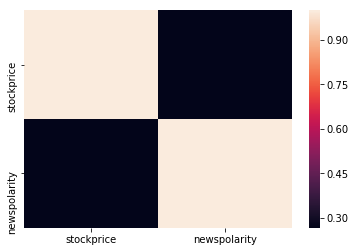

In [81]:
sns.heatmap(corr_mat)